# Welche Qualität hat der Rotwein?

# 1. Business Understanding
A winery wants to make sure it always produces high Quality and tasty wine.
They employ professional wine tasters to test all new batches of wine.
These Professionals then rate the wine on a scale from 1 to 10.
But this process is expensive and subjective.
The wine manufactory would like to use a machine learning model in order to generate predictions about quality.
The ultimate goal is to develop a model 
that automatically categorizes new wine batches based on its chemical attributes.


# 2. Data and Data Understanding  

## 2.1. Import of Relevant Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

%matplotlib inline

## 2.2. Read Data  

In [2]:
data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/What_Quality_does_the_Red_wine_have_winequality.csv')
data.to_csv('data.csv', index=False)

## 2.3. Deskriptive Datenanalyse

### Data description
The dataset named "Wine Quality Data Set" has been extracted from the UCI website 
and gives us real data for our wine manufactory. The data 
were collected in 2009 and come from Northern Portugal. The data set has 
entries for red and white wines. The dataset of the 
red wines thus has 12 columns and 1600 entries. The columns are 
named after the ingredients and the quality of a red wine in table 1.  

| Feature  | Data Type|
|-----|------|
|fixed acidity       |   float64  |
|volatile acidity    |   float64  |
|citric acid         |   float64  |
|residual sugar      |   float64  |
|chlorides           |   float64  |
|free sulfur dioxide |   float64  |
|total sulfur dioxide|   float64  |
|density             |   float64  |
|pH                  |   float64  |
|sulphates           |   float64  |
|alcohol             |   float64  |
|quality             |   int64    |

A red wine consists of water, alcohol and extracts. The exact 
mixture of these 3 essential ingredients can make a red wine a real 
a true pleasure. In my opinion, a good red wine contains 
a high alcohol and sugar content. Whether my opinion about a good wine is true 
is true, we can take a closer look in the next chapter.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The data set has 1599 entries. The columns 'free sulfur dioxide' and 'total sulfur dioxide' have very high maximum values. In addition, we see that our target variable has the smallest value of 3 and the largest value of 8. Here we must consider whether the target variable must be divided into good and bad.

## 2.4 Data Cleaning

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no Null values in the dataset

In [6]:
data[data.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


There are duplicates in the dataset. But in this case we don't want to remove these, as they are actually different wine batches, that just happen to have the same chemical characteristics and the same quality. It wouldn't be bad, if the model specializes on the more common wines

In [7]:
data_clean = data

<Axes: xlabel='quality', ylabel='count'>

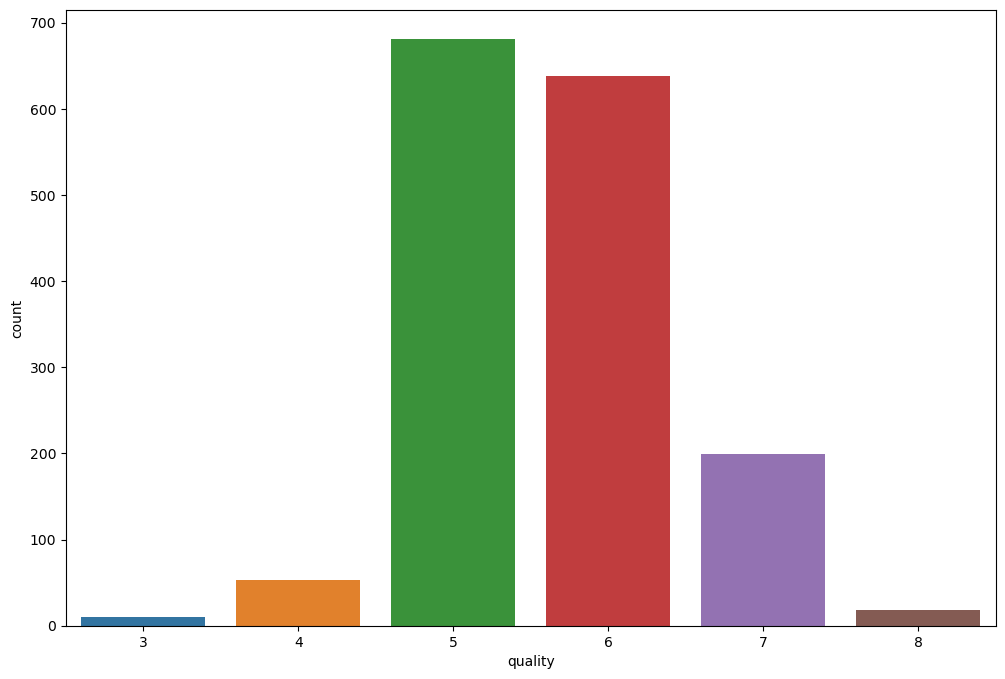

In [8]:
# Analyse the target variable
plt.figure(figsize =(12, 8))
sns.countplot(x="quality", data=data_clean )

# 3. Data Preparation  

## 3.1 Remove Outliers

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

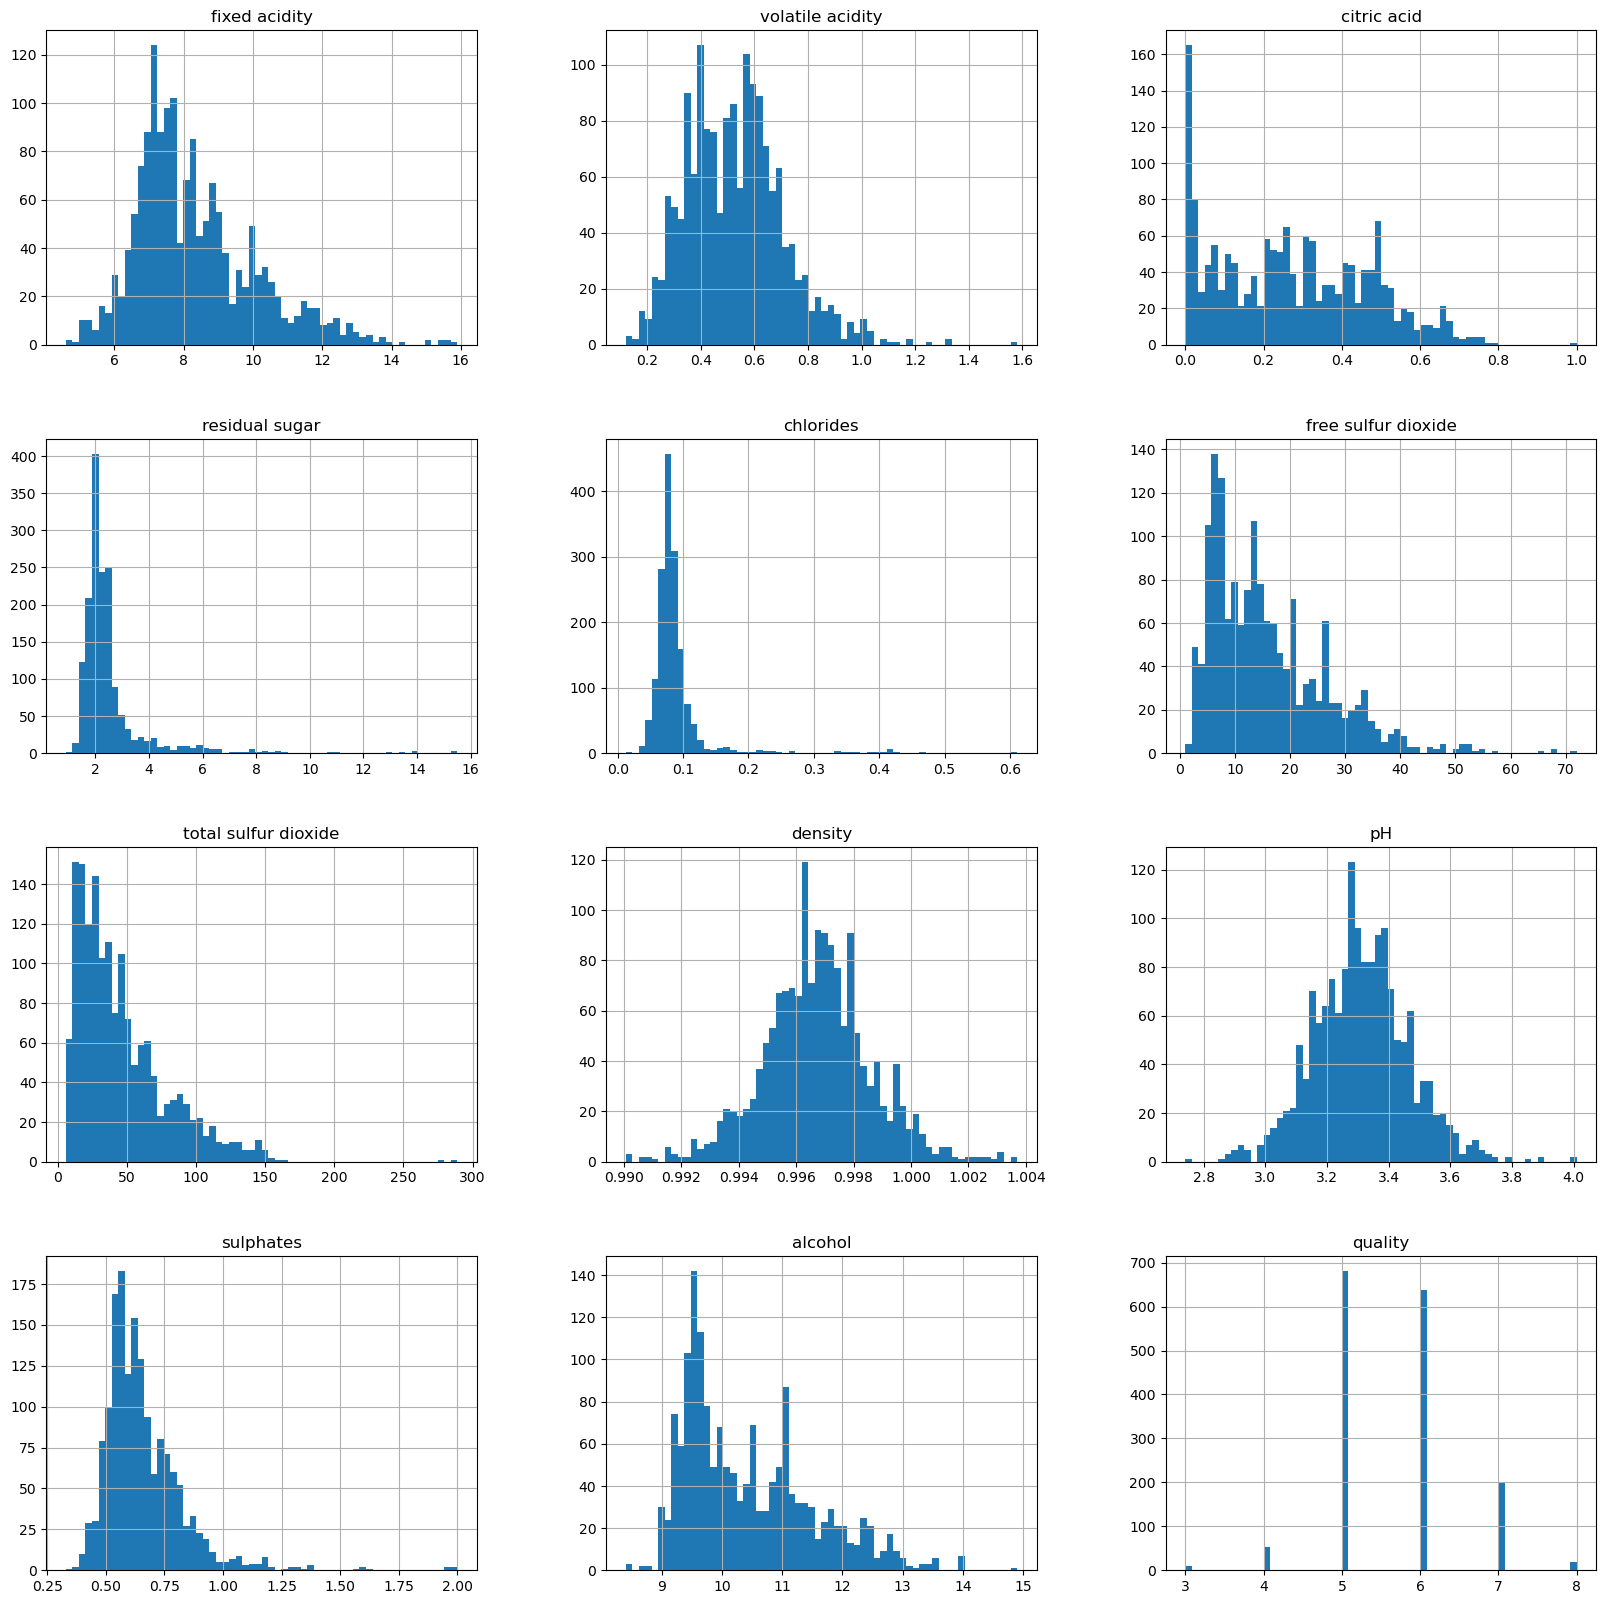

In [9]:
data_clean.hist(figsize=(20,20), bins= 60)

With the histograms of all columns, we can now see at a glance how their values are distributed. It is noticeable that some features do not show a normal distribution and therefore have outliers in their values.

Fixed Acidity

<Axes: xlabel='fixed acidity', ylabel='Count'>

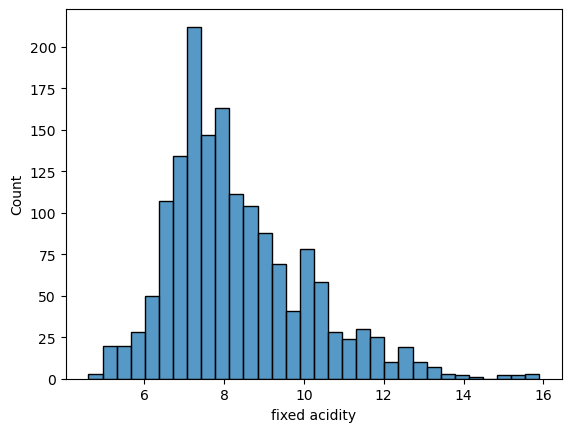

In [10]:
sns.histplot(data_clean['fixed acidity'])

The graph looks normally distributed, which is why the values remain in the first step

Volatile Acidity

<Axes: xlabel='volatile acidity', ylabel='Count'>

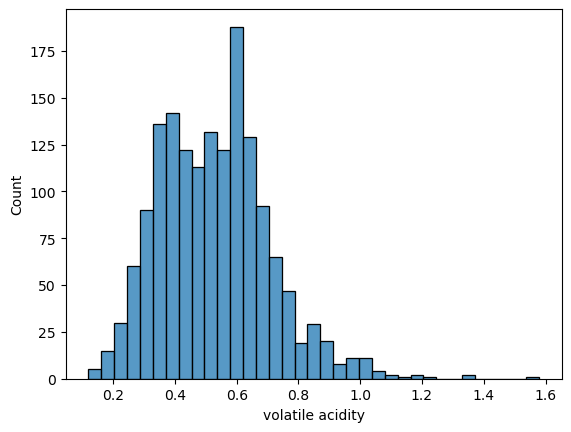

In [11]:
sns.histplot(data_clean['volatile acidity'])

In [12]:
q1 = data_clean['volatile acidity'].quantile(0.99)
q1

1.02

<Axes: xlabel='volatile acidity', ylabel='Count'>

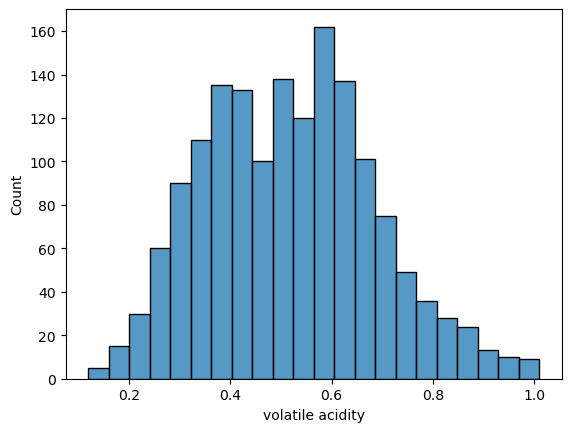

In [13]:
data1 = data_clean[data_clean['volatile acidity']<q1]
sns.histplot(data1['volatile acidity'])

Citric Acid

<Axes: xlabel='citric acid', ylabel='Count'>

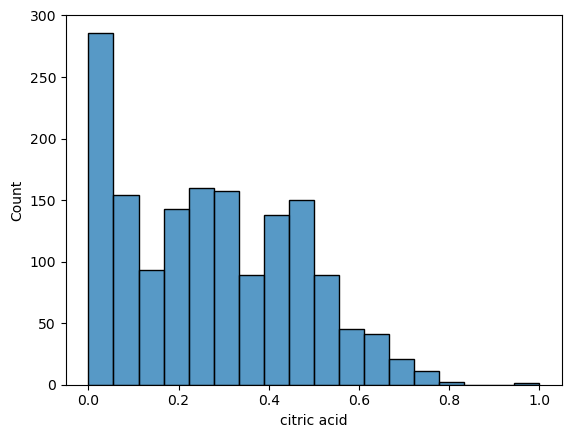

In [14]:
sns.histplot(data1['citric acid'])

Residual Sugar

<Axes: xlabel='residual sugar', ylabel='Count'>

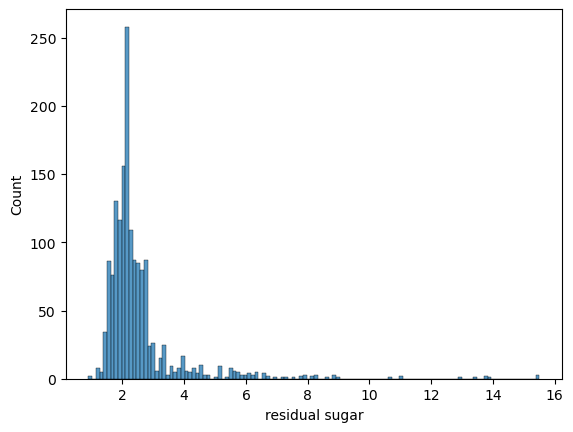

In [15]:
sns.histplot(data1['residual sugar'])

<Axes: xlabel='quality', ylabel='residual sugar'>

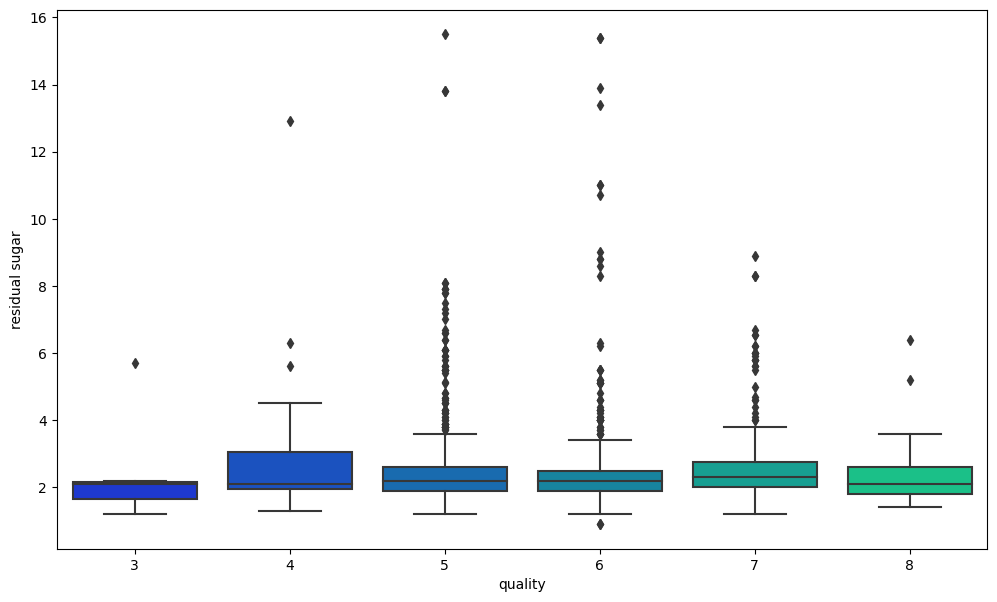

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='quality',y='residual sugar', data=data1,palette='winter')

Residual Sugar shows a lot of outliers in relation to the target variable. A part of the outliers is now removed to create a more accurate data picture.

In [17]:
q2 = data1['residual sugar'].quantile(0.99)
q2

8.363000000000012

<Axes: xlabel='residual sugar', ylabel='Count'>

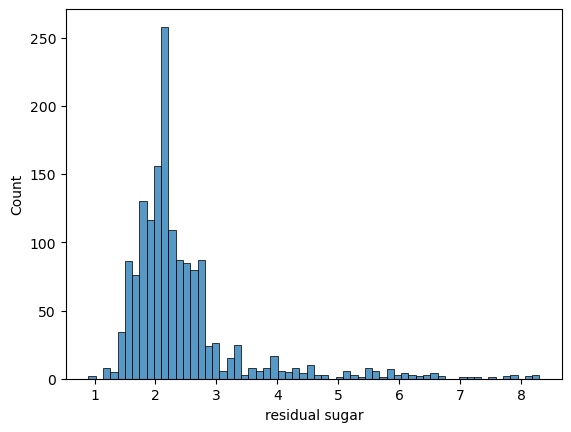

In [18]:
data2= data1[data1['residual sugar']<q2]
sns.histplot(data2['residual sugar'])

<Axes: xlabel='quality', ylabel='residual sugar'>

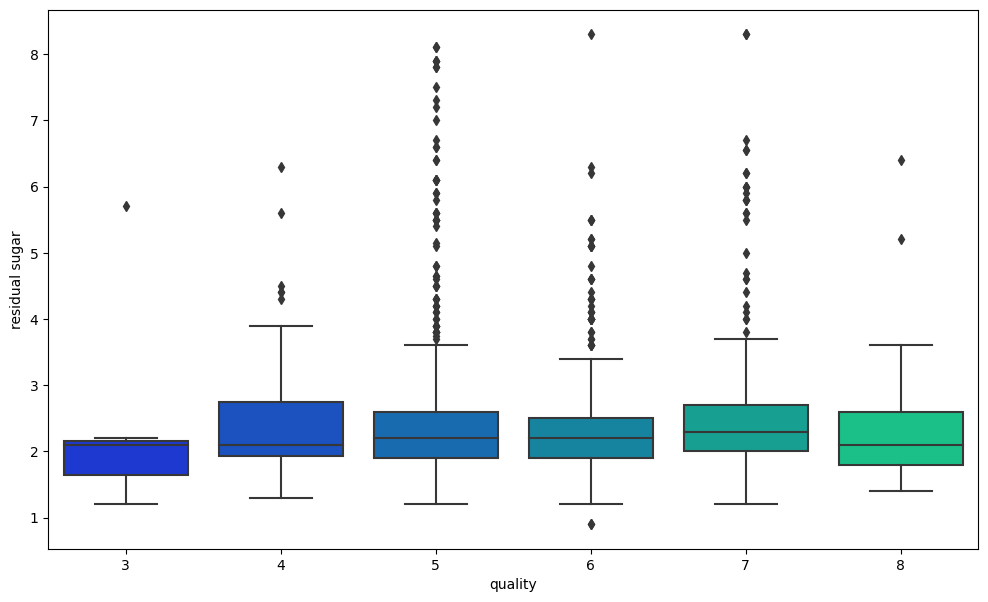

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='quality',y='residual sugar', data=data2,palette='winter')

There are still outliers to be seen, however these can still be changed after a first run of the model

Chlorides


<Axes: xlabel='chlorides', ylabel='Count'>

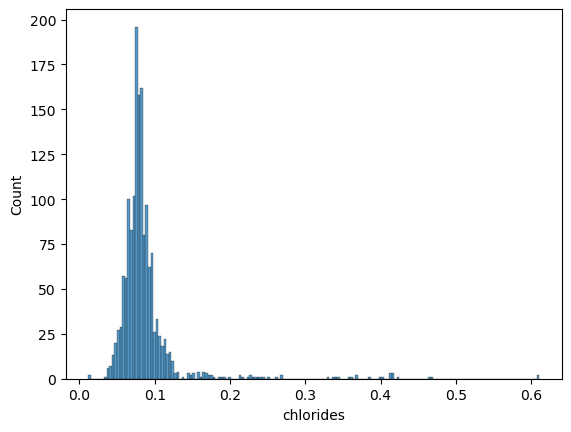

In [20]:
sns.histplot(data2['chlorides'])

In [21]:
q3 = data2['chlorides'].quantile(0.98)
q3

0.226

<Axes: xlabel='chlorides', ylabel='Count'>

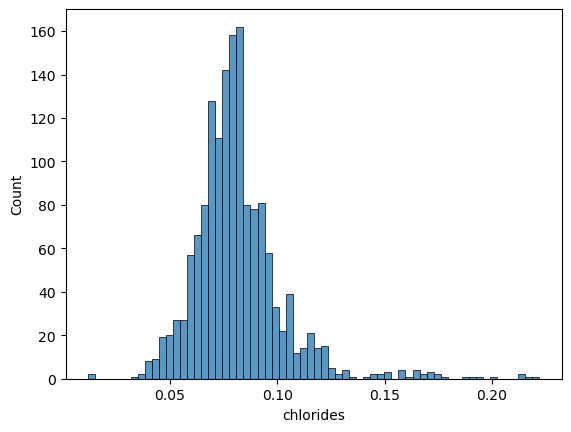

In [22]:
data3= data2[data2['chlorides']<q3]
sns.histplot(data3['chlorides'])

Free Sulfur Dioxide

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

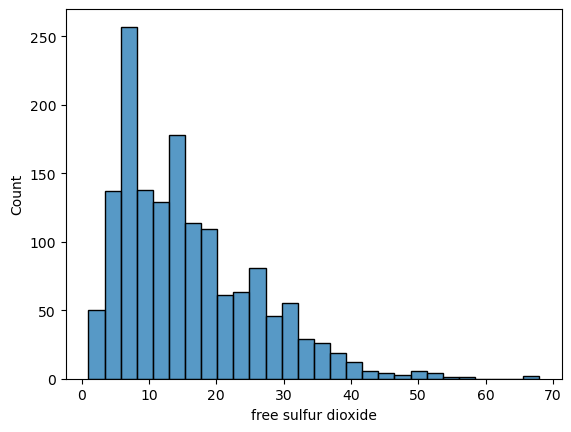

In [23]:
sns.histplot(data3['free sulfur dioxide'])

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

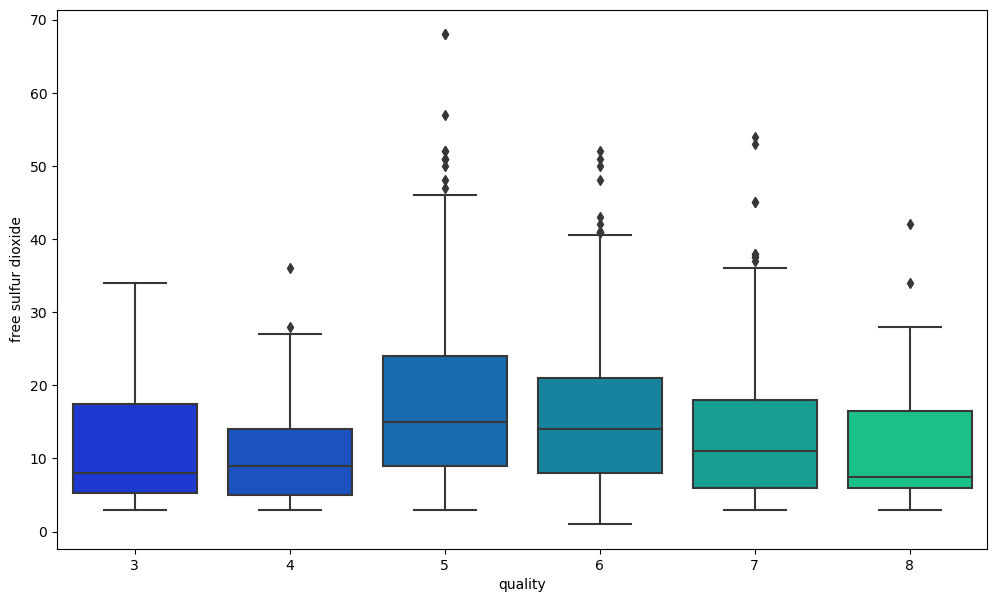

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='quality',y='free sulfur dioxide', data=data3,palette='winter')

In [25]:
q4 = data3['free sulfur dioxide'].quantile(0.99)
q4

47.700000000000045

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

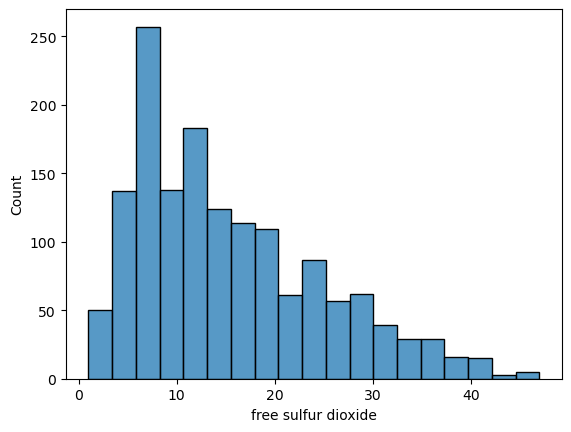

In [26]:
data4= data3[data3['free sulfur dioxide']<q4]
sns.histplot(data4['free sulfur dioxide'])

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

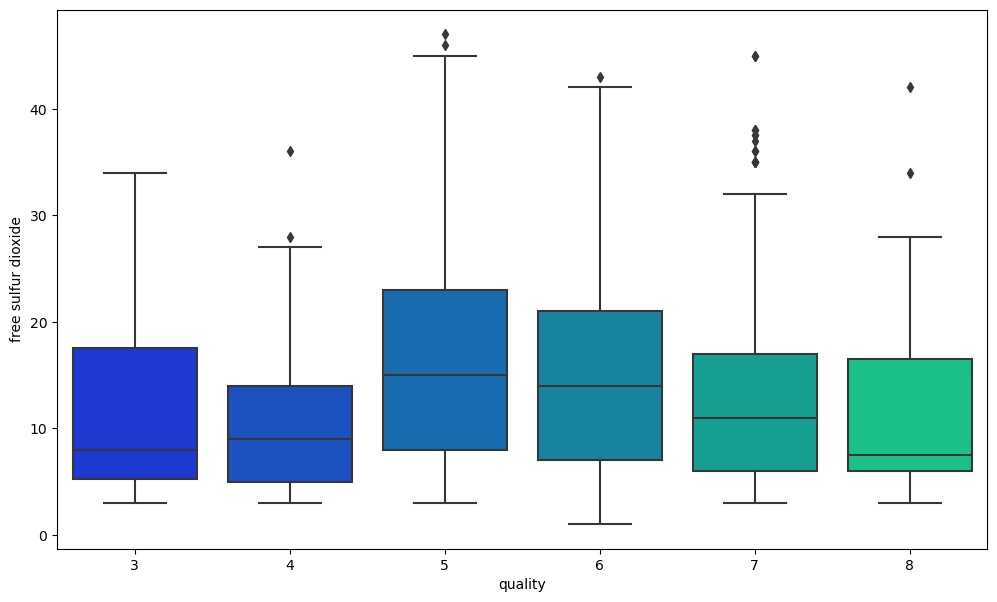

In [27]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='quality',y='free sulfur dioxide', data=data4,palette='winter')

Zuvor erkannte Ausreißer der Spalte 'free sulfur dioxide' entfernt und ein ausgeglichenes Bild zu unserer Zielvariablen geschaffen

Total Sulfur Dioxide

<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

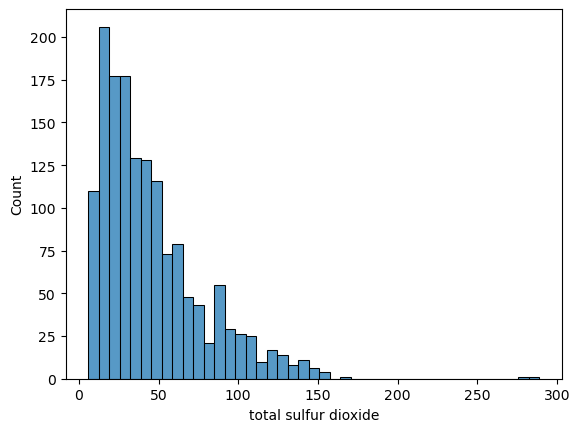

In [28]:
sns.histplot(data4['total sulfur dioxide'])

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

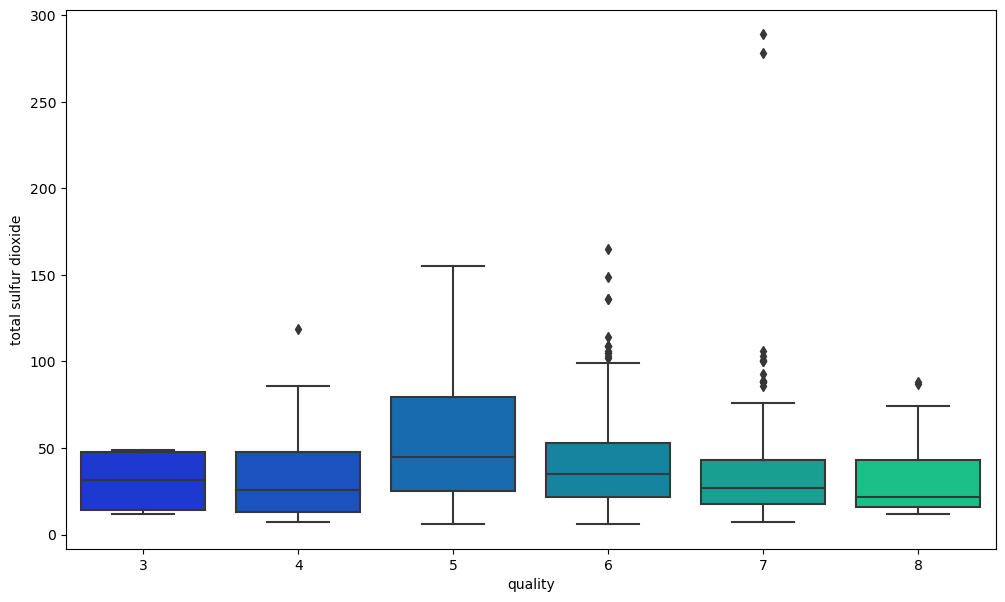

In [29]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='quality',y='total sulfur dioxide', data=data4,palette='winter')

In [30]:
q5 = data4['total sulfur dioxide'].quantile(0.99)
q5

143.8599999999999

<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

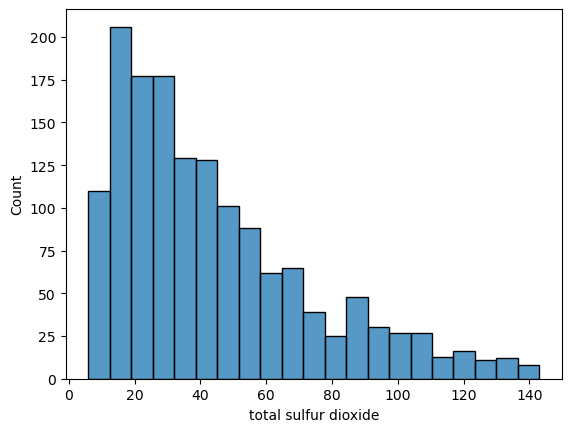

In [31]:
data5 = data4[data4['total sulfur dioxide']<q5]
sns.histplot(data5['total sulfur dioxide'])

Sulphates

<Axes: xlabel='sulphates', ylabel='Count'>

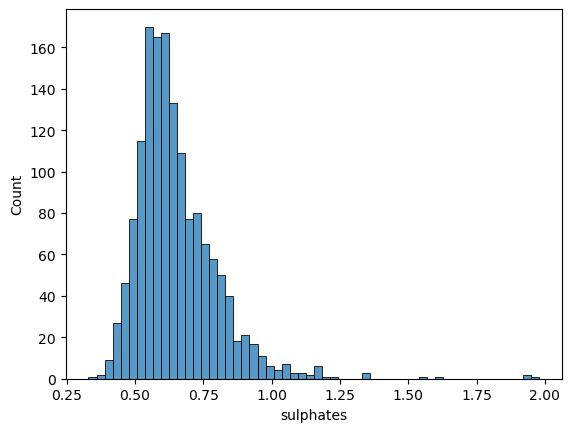

In [32]:
sns.histplot(data5['sulphates'])

In [33]:
q6 = data5['sulphates'].quantile(0.99)
q6

1.1601999999999997

<Axes: xlabel='sulphates', ylabel='Count'>

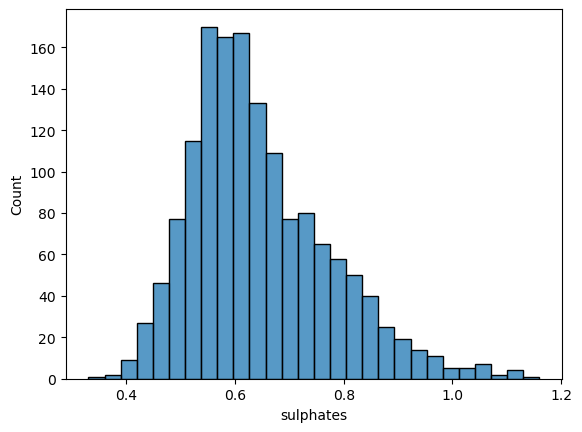

In [34]:
data6 = data5[data5['sulphates']<q6]
sns.histplot(data6['sulphates'])

<Axes: xlabel='alcohol', ylabel='Count'>

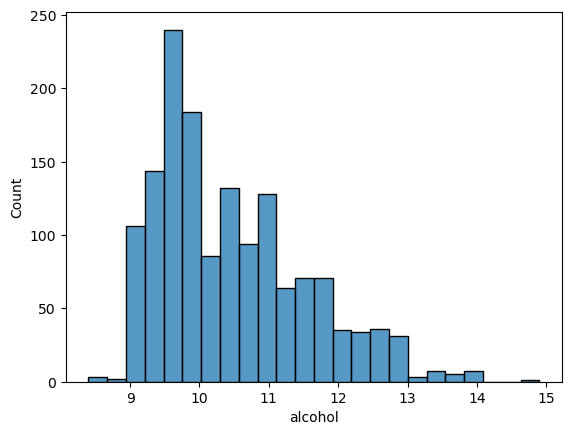

In [35]:
sns.histplot(data6['alcohol'])

<Axes: xlabel='quality', ylabel='alcohol'>

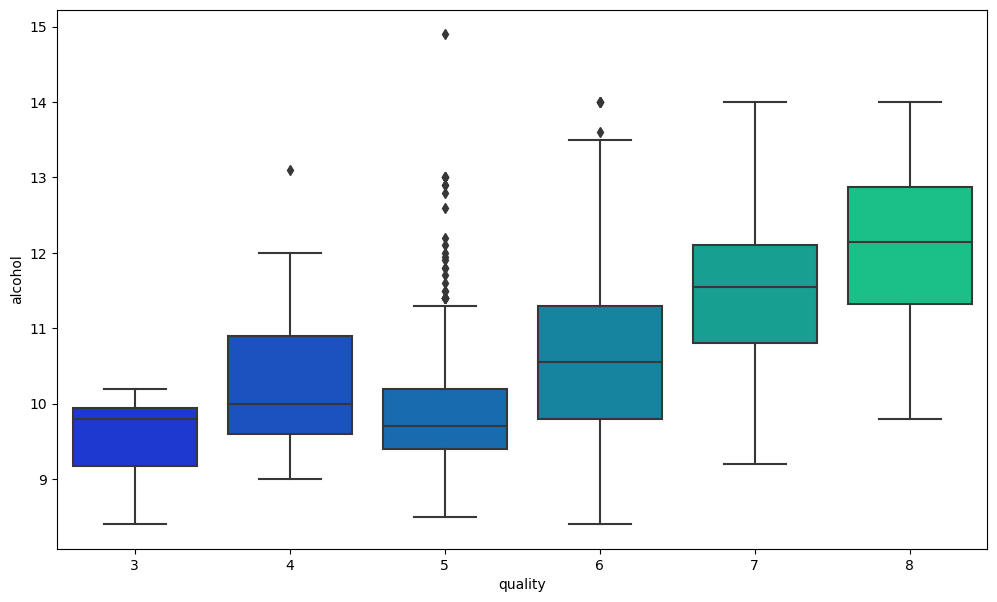

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='quality',y='alcohol', data=data6,palette='winter')

the greater the alcohol content in the wine, the better the wine is rated by the professionals

All features were cleaned up in the first step and can now be used for the model.  
he target variable Quality will be split into good 1 and bad 0.
This changes the Problem from a Regression task to a (binary) categorization task

## Transform the Targetvariable 'Quality' to binary Classification

In [37]:
def quality_range(quality):
    if quality <= 5:
        return 0
    elif quality >=6:
        return 1

In [38]:
# make a (deep) copy, to make sure pandas doesn't complain and makes the correct thing
# see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
data6 = data6.copy()

In [39]:
data6['quality_range'] = data6['quality'].apply(quality_range)

In [40]:
data6.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_range
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,8.331267,0.520044,0.266961,2.427763,0.081051,15.176550,43.828841,0.996705,3.316846,0.643652,10.455492,5.661725,0.546496
std,1.761040,0.165732,0.192996,0.975109,0.020813,9.343802,29.133109,0.001854,0.149700,0.129927,1.071880,0.800449,0.498001
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.220000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.315000,0.620000,10.200000,6.000000,1.000000
75%,9.225000,0.630000,0.420000,2.600000,0.089000,21.000000,59.000000,0.997800,3.400000,0.720000,11.100000,6.000000,1.000000
max,15.900000,1.010000,0.790000,8.300000,0.222000,47.000000,143.000000,1.003200,4.010000,1.160000,14.900000,8.000000,1.000000


In [41]:
data6.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_range
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


With the method quality_range() we have splitted the values of the column 'quality'. All values less than and equal to 5 got the value 0 (, indicating worse then average quality). All values 6 and greater got the value 1 (indicating above average quality).

<Axes: xlabel='quality_range', ylabel='count'>

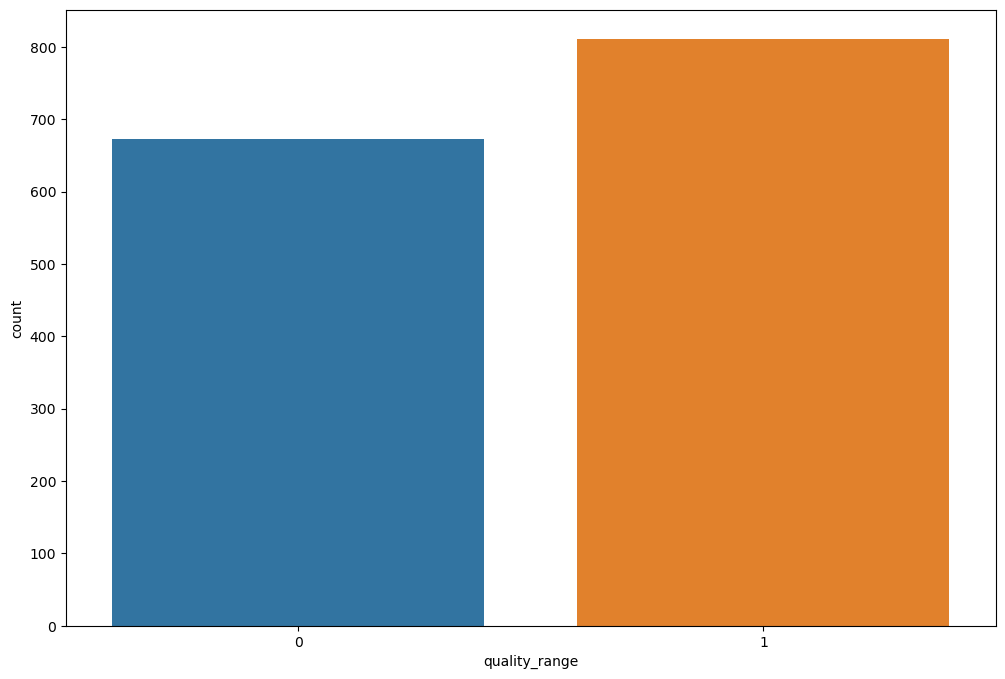

In [42]:
plt.figure(figsize =(12, 8))
sns.countplot(data=data6, x="quality_range")

The Target variable is balanced

In [43]:
data6.drop('quality', axis=1, inplace=True)

In [44]:
data6.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_range
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,8.331267,0.520044,0.266961,2.427763,0.081051,15.176550,43.828841,0.996705,3.316846,0.643652,10.455492,0.546496
std,1.761040,0.165732,0.192996,0.975109,0.020813,9.343802,29.133109,0.001854,0.149700,0.129927,1.071880,0.498001
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.315000,0.620000,10.200000,1.000000
75%,9.225000,0.630000,0.420000,2.600000,0.089000,21.000000,59.000000,0.997800,3.400000,0.720000,11.100000,1.000000
max,15.900000,1.010000,0.790000,8.300000,0.222000,47.000000,143.000000,1.003200,4.010000,1.160000,14.900000,1.000000


## 3.3. Test for Multicollinearity  

<Axes: >

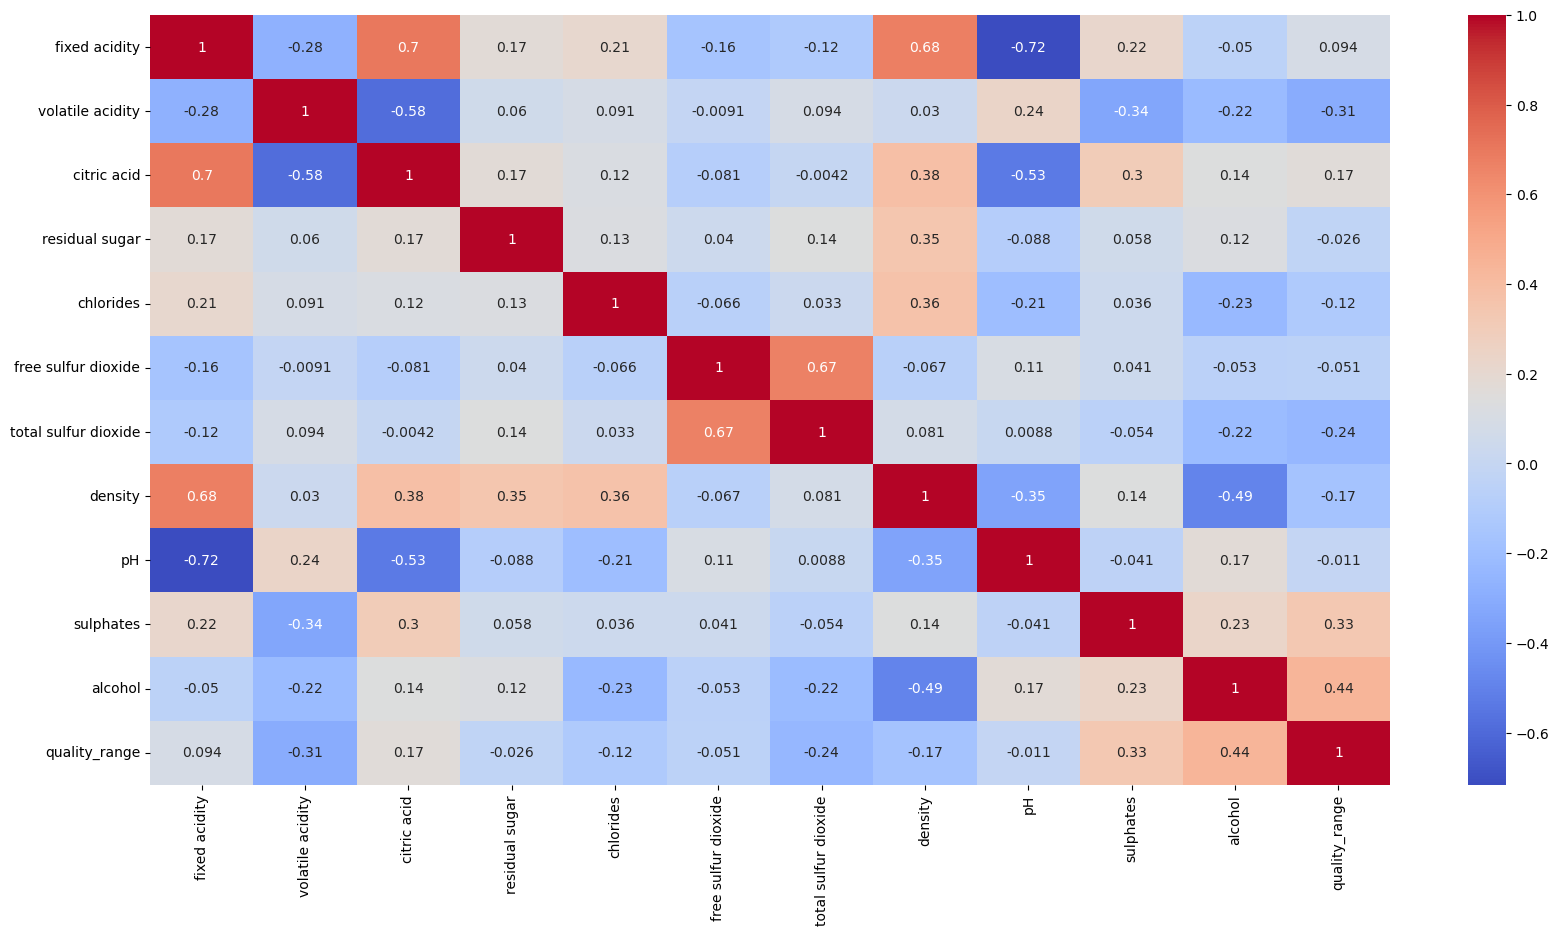

In [45]:
plt.figure(figsize=(20,10))
feature_corr = data6.corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

In [46]:
data6.drop('fixed acidity', axis=1, inplace=True)

fixed acidity is dropped, as it highly correlates with pH

<Axes: >

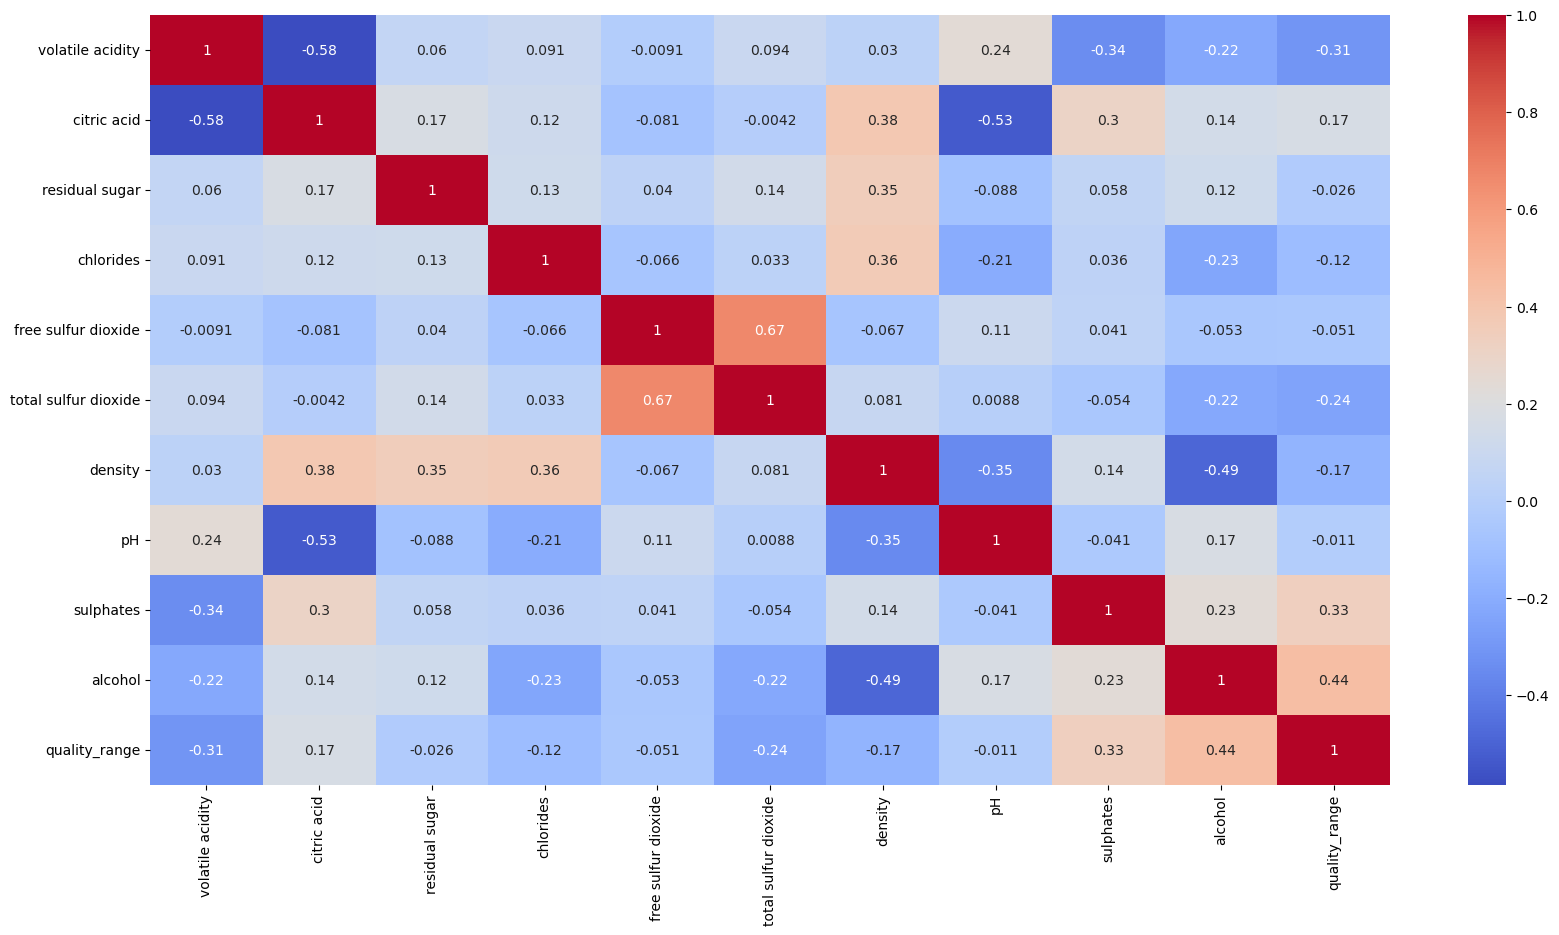

In [47]:
plt.figure(figsize=(20,10))
feature_corr = data6.corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

## 3.4. Create Test and Training Data 

In [48]:
x_train, x_test, y_train, y_test = train_test_split(data6.drop('quality_range', axis=1),data6['quality_range'], test_size=0.2, random_state=365)

# 4. Modelling and Evaluation

## 4.1. Scale and transform Data

In [49]:
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

## 4.1 Modellbildung logistsiche Regression

In [50]:
model_logistic_regression = LogisticRegression(random_state=0, C=1e8, max_iter=1000)

In [51]:
# Train LogistModel
model_logistic_regression.fit(x_train,y_train)
prediction_test = model_logistic_regression.predict(x_test)
prediction_train = model_logistic_regression.predict(x_train)

### Evaluation

In [52]:
acc = metrics.accuracy_score(y_test, prediction_test)
print('Accuracy on the Test dataset: {}'.format(acc))

Accuracy on the Test dataset: 0.6936026936026936


In [53]:
print("Trainingsdaten:")
print(classification_report(y_train,prediction_train))
print("Testdaten:")
print(classification_report(y_test,prediction_test))

Trainingsdaten:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       534
           1       0.78      0.79      0.79       653

    accuracy                           0.76      1187
   macro avg       0.76      0.76      0.76      1187
weighted avg       0.76      0.76      0.76      1187

Testdaten:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       139
           1       0.71      0.71      0.71       158

    accuracy                           0.69       297
   macro avg       0.69      0.69      0.69       297
weighted avg       0.69      0.69      0.69       297



Text(0.5, 47.7222222222222, 'Predicted label')

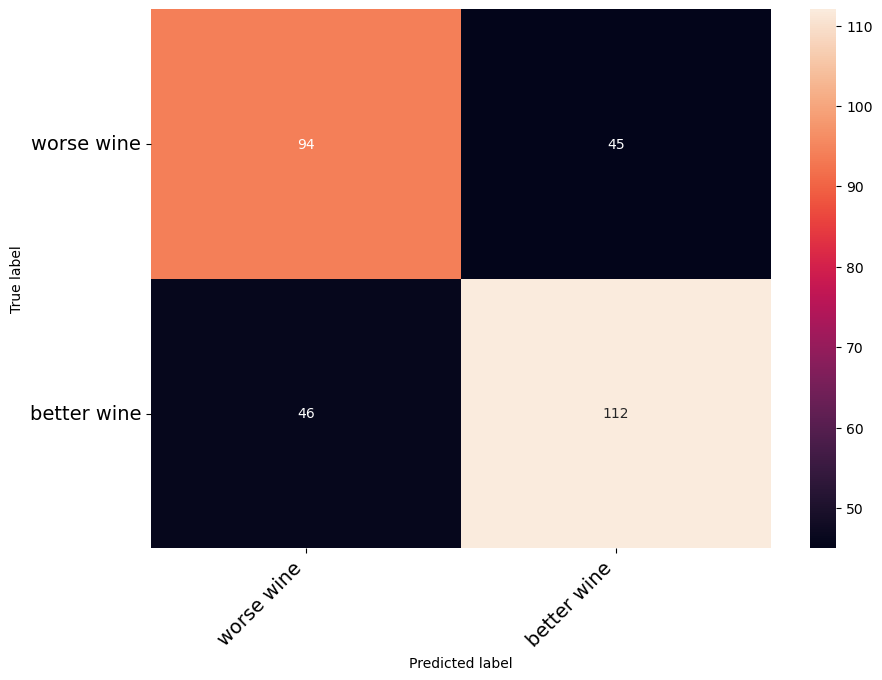

In [54]:
# Confusion-Matrix Test dataset
cm = confusion_matrix(y_test,prediction_test)
df_cm = pd.DataFrame(cm, index=['worse wine','better wine'], columns=['worse wine', 'better wine'],)
fig = plt.figure(figsize=[10,7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [55]:
# confusion Matrix 
tn, fp, fn, tp = cm.ravel()
recall = tp/(fn+tp)
precision = tp/(tp+fp)
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print("True Positives: " + str(tp))
print("Recall: " + str(recall))
print("Precision: " + str(precision))

True Negatives: 94
False Positives: 45
False Negatives: 46
True Positives: 112
Recall: 0.7088607594936709
Precision: 0.7133757961783439


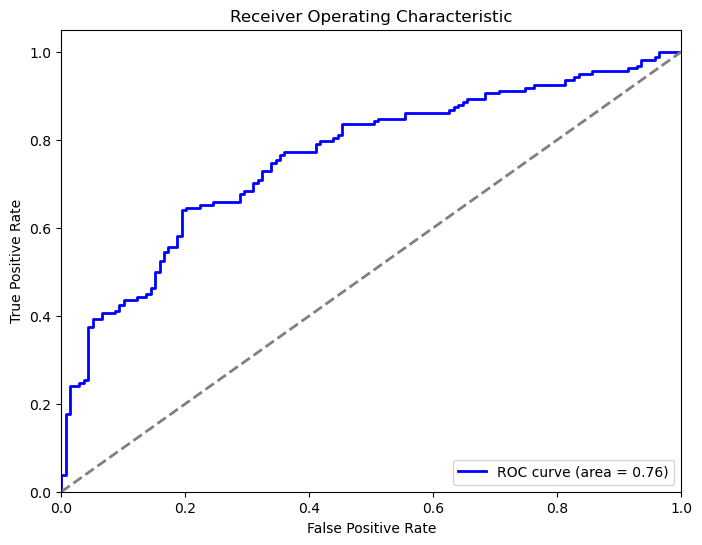

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming model_logistic_regression is your trained model
# x_test and y_test are your test data and test labels respectively

y_pred_prob = model_logistic_regression.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
# print out Regression parameters (weights and biases)
weights = pd.Series(model_logistic_regression.coef_[0], index=x_train.columns.values)
weights.sort_values(ascending = False)

sulphates               5.186273
alcohol                 0.913987
free sulfur dioxide     0.020072
total sulfur dioxide   -0.018107
residual sugar         -0.178077
citric acid            -1.279958
pH                     -1.626052
density                -1.934006
volatile acidity       -3.117129
chlorides              -3.541015
dtype: float64

Axes(0.125,0.11;0.775x0.77)


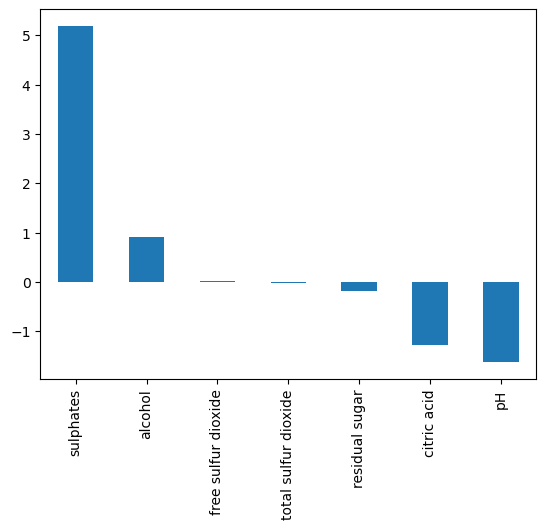

In [60]:
# grafically ilustrate the most important features of a good wine 
weights = pd.Series(model_logistic_regression.coef_[0], index=x_train.columns.values)
print (weights.sort_values(ascending = False)[:7].plot(kind='bar'))

## 3.3 Ein linear Regression

In [61]:
X = data6.drop(['quality_range'], axis=1)
Y = data6['quality_range']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=365)

In [63]:
model_linear_regression = LinearRegression()

In [64]:
model_linear_regression.fit(x_train, y_train)

LinearRegression()

In [65]:
print(model_linear_regression.intercept_)

-10.073788720357728


In [66]:
coeff_data = pd.DataFrame(model_linear_regression.coef_, X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
volatile acidity,-0.560376
citric acid,-0.234547
residual sugar,-0.035414
chlorides,-0.557458
free sulfur dioxide,0.004425
total sulfur dioxide,-0.003436
density,9.804198
pH,-0.254166
sulphates,0.843459
alcohol,0.164131


In [67]:
predictions = model_linear_regression.predict(x_test)

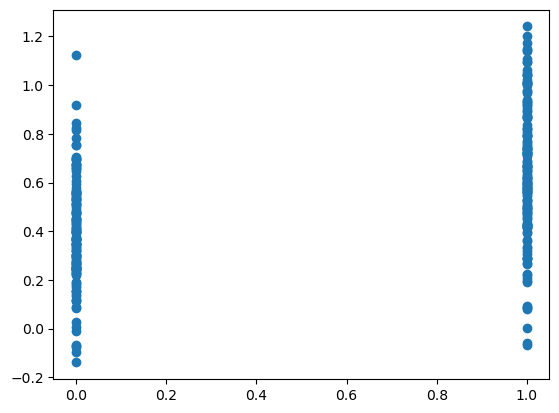

In [68]:
plt.scatter(y_test,predictions)

<Axes: xlabel='quality_range', ylabel='Count'>

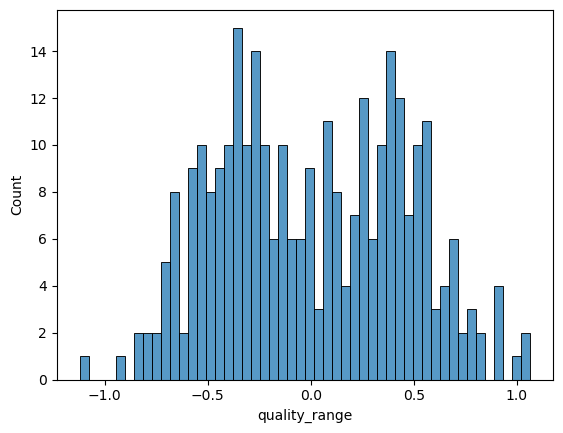

In [69]:
sns.histplot((y_test-predictions),bins=50)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.38968582124065887
MSE: 0.20325428149258173
RMSE: 0.45083731155770784


In [71]:
print('R sq: ',model_linear_regression.score(x_train,y_train))

R sq:  0.3315244678627578


In [72]:
print('Correlation: ', math.sqrt(model_linear_regression.score(x_train,y_train)))

Correlation:  0.5757816147314516


In [73]:
print('R sq: ',model_linear_regression.score(x_test,y_test))

R sq:  0.1836418852481949


## Tesnorflow Classification

In [74]:
tf.__version__

'2.16.1'

In [75]:
X_train.shape

(1187, 10)

In [76]:
# Define the Tensor flow Neural Network with Inputlayer, 2x Hiddenlayer and one Outputlayer

model = Sequential()
model.add(Dense(units=10,activation='relu')) 
model.add(Dense(units=8,activation='relu')) #Hiddenlayer
model.add(Dense(units=5,activation='relu')) #Hiddenlayer

model.add(Dense(units=1,activation='sigmoid')) #Outputlayer 1 Target

# For a binary classification Problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [77]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=7,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7019 - val_loss: 0.6897
Epoch 2/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6836 - val_loss: 0.6764
Epoch 3/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6592 - val_loss: 0.6509
Epoch 4/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6171 - val_loss: 0.6253
Epoch 5/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5811 - val_loss: 0.6078
Epoch 6/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5387 - val_loss: 0.6024
Epoch 7/7
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5137 - val_loss: 0.6025


<Axes: >

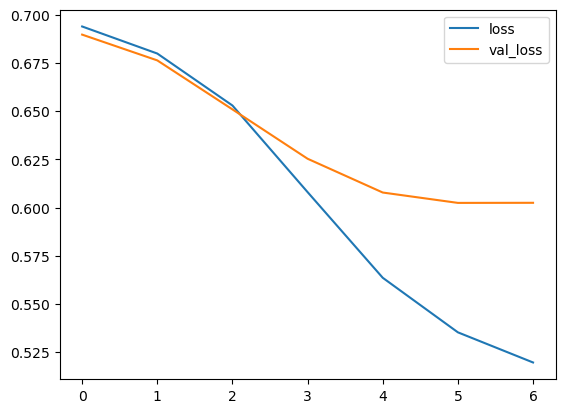

In [78]:
#model.history.history
model_loss = pd.DataFrame(model.history.history)
# Create a plot to compare the performance on the training dataset to the loss on the validation dataset
model_loss.plot()

In [79]:
#Vorhersagen bestimmen
predictions = (model.predict(X_test) > 0.5).astype("int32")
prediction = (model.predict(X_train) > 0.5).astype("int32")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


In [80]:
# Klassifikations Report
print("Trainingsdaten:")
print(classification_report(y_train,prediction))
print("Testdaten:")
print(classification_report(y_test,predictions))

Trainingsdaten:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       534
           1       0.79      0.76      0.77       653

    accuracy                           0.76      1187
   macro avg       0.75      0.75      0.75      1187
weighted avg       0.76      0.76      0.76      1187

Testdaten:
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       139
           1       0.71      0.67      0.69       158

    accuracy                           0.68       297
   macro avg       0.68      0.68      0.68       297
weighted avg       0.68      0.68      0.68       297



Text(0.5, 47.7222222222222, 'Predicted label')

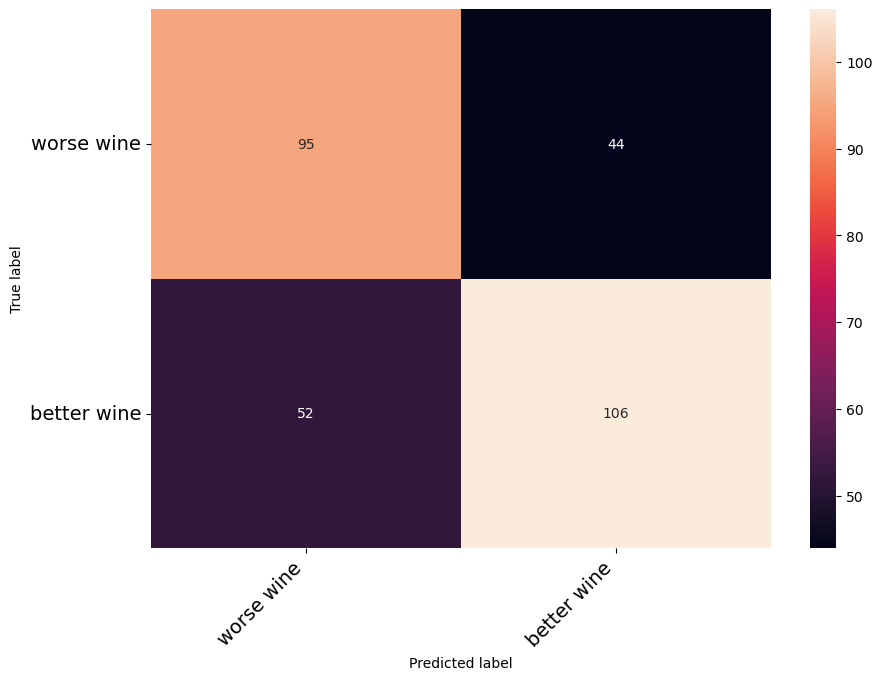

In [81]:
# Confusion-Matrix Testdaten
cm = confusion_matrix(y_test,predictions)
df_cm = pd.DataFrame(cm, index=['worse wine','better wine'], columns=['worse wine', 'better wine'],)
fig = plt.figure(figsize=[10,7])
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [82]:
# Confusion Matrix
tn, fp, fn, tp = cm.ravel()
recall = tp/(fn+tp)
precision = tp/(tp+fp)
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print("True Positives: " + str(tp))
print("Recall: " + str(recall))
print("Precision: " + str(precision))

True Negatives: 95
False Positives: 44
False Negatives: 52
True Positives: 106
Recall: 0.6708860759493671
Precision: 0.7066666666666667
